# Palmer Penguins
This notebook contains my analyis of the famous palmer penguins dataset.

## Palmer Penguins Dataset Overview

The Palmer Penguins dataset is a dataset that is commonly used as an introduction to the field of data analytics. It contains data on penguins collected from three Antarctic islands: Dream, Torgersen, and Biscoe located in the Palmer Archipelago near Palmer Station. The dataset was created by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER. This dataset shares similarities with the famous Iris dataset, both datasets are of manageable size for beginner data analalysts and provide a good starting point to explore data analytical concepts and relationships. https://journal.r-project.org/articles/RJ-2022-020/

## Variables

1. species:
    
    The species of penguins. This is a categorical variable with three levels: Adelie, Chinstrap, and Gentoo.

2. island:

    The island where the penguins were observed. This is also a categorical variable with three levels: Dream, Torgersen, and Biscoe.

3. bill_length_mm:

    The length of the penguin's bill in millimeters. This is a numerical variable representing a physical characteristic of the penguins.

4. bill_depth_mm:

    The depth of the penguin's bill in millimeters. Like bill_length_mm, this is also a numerical variable representing a physical characteristic.

5. flipper_length_mm:

    The length of the penguin's flipper in millimeters. Again, this is a numerical variable representing a physical characteristic.

6. body_mass_g:

    The body mass of the penguin in grams. This is another numerical variable representing the weight of the penguins.

7. sex:

    The sex of the penguin, if known. This is a categorical variable with two levels: male and female.

## Dataset Size

The Palmer Penguins dataset consists of 344 rows and 7 columns.

## Purpose

The data is used to further our knowledge on penguin biology. It allows data scientists to explore relationships between the variables such as how penguins of different sexes, islands, and species may differ physically.

## Data Source

This data was collected at the Palmer station in Antartica and is made publically avaiable for research and educational purposes.

## Variable Types For Modeling Palmer Penguin Data Set

To begin investing the Palmer Peguin Data Set, the variables must be organised into specific types to allow the data to be modeled and graphically represented. The following variables should be considered to achieve this:

1. Categorical Variables (https://statisticseasily.com/categorical-variable/)

A categorical variable is a type of qualitative data that is grouped into distinct categories or classifications. These variables are non-numeric and represent some qualitative property of the data. In the Palmer Penguin Data Set, the sex of the penguin, the species of the penguin, and which island it was sighted on can all be classed as categorical variables. Categorical variables are typically serperated into two types: nominal and ordinal. Nominal variables are categorical variables without a natural or intrinsic order like name, sex etc. Ordinal variables imply a specific rank or order, an example of this would be a rating scale (poor, fair, good, very good, excellent). Each value has a particular ranking order, poor representing the bottom and excellent at the top. All the categorical data used in this project fall under the nominal categorical variable type (sex, species, island). This data needs to be encoded numerically by label encoding or one hot encoding. This will allow the categorical variables to be modeled and compared against other variables like the numerical variable. One hot encoding would be the preferred method as this label encoding makes it seem that there is a ranking between values. https://www.statology.org/label-encoding-vs-one-hot-encoding/

2. Numeric Variables (https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-eng.htm)

Numeric variables (also called quantitative variables) are quantifiable data that a represented with numbers. They can be further divided into two catagories called continuous and discrete variables. Continous variables are data points that can assume an infinite number of real values within a given interval, for example a persons height. A persons measured height could theoretically have an infinite number of values as the percision of the measuring tools increases (1.62 M to 1.62364757 M etc.) A simpler way to look at continuous variables would be numerical variables which have been obtained through measurement. Discrete variables differ as they can only assume a finite number of values within an interval, an example of this would be the number of cars on a street. All the numerical variables used in this project fall under the continuous numeric variable type (bill length, bill depth, flipper length, body mass). These variables give quantifiable data about the physical characteristics of the penguins. This data can be modeled directly and can be used to investigate if there are any significant relationships between the variables or if they can be used in predictive modeling.

3. Binary Variables

Binary variables are variables which only have two possible outcomes, for example pass/fail or true/false. The sex of the penguins is a categorical variable that can be converted to a binary variable as there are only two possible outcomes, male or female. These variables can be encoded the same as the categorical variables.

4. Target Variables

The target variable or sometimes refered to as the dependant variable, is the variable that we want to predict or explain using modeling. An example of this would be if we wanted to find out the species of penguin based on its physical characteristics such as its flipper length, in this case the species would be the target variable.




In [55]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
# Load the penguins data set.
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
df = pd.read_csv(url)




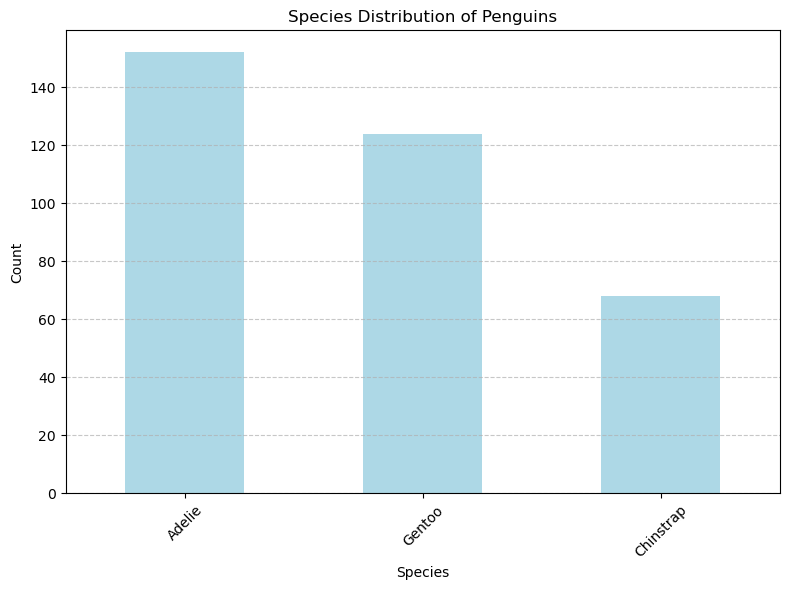

In [169]:
# Create bar chart of species distribution
species_counts = df['species'].value_counts()

plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='lightblue')

plt.title('Species Distribution of Penguins')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis

plt.tight_layout()
plt.show()

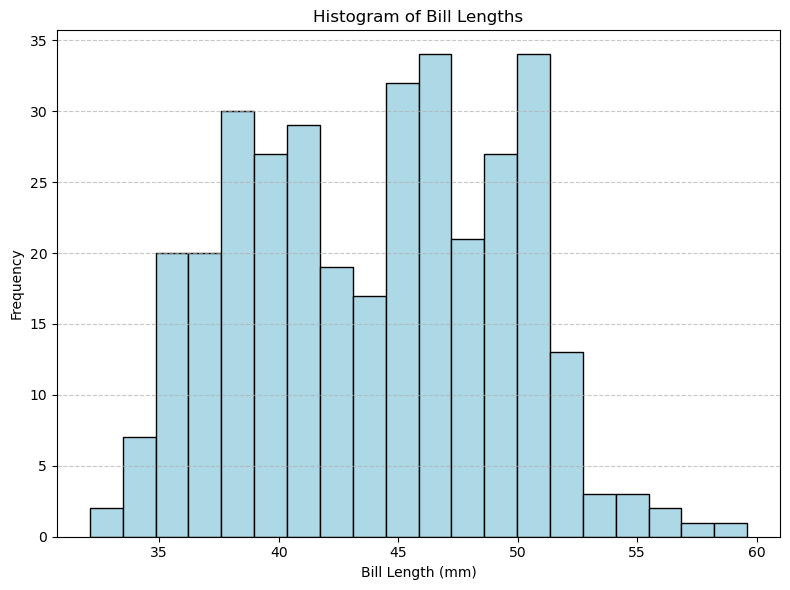

In [181]:
# Histogram of Bill Lengths
plt.figure(figsize=(8, 6))
plt.hist(df['bill_length_mm'], bins=20, color='lightblue', edgecolor='black')

plt.title('Histogram of Bill Lengths')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis

plt.tight_layout()
plt.show()

## Analysis of two variables from the data set

In [182]:
# Check for missing values in 'flipper_length_mm' and 'body_mass_g' columns
missing_flipper_length = df['flipper_length_mm'].isnull().sum()
missing_body_mass = df['body_mass_g'].isnull().sum()

print("Number of missing values in 'flipper_length_mm':", missing_flipper_length)
print("Number of missing values in 'body_mass_g':", missing_body_mass)



Number of missing values in 'flipper_length_mm': 2
Number of missing values in 'body_mass_g': 2


In [183]:
# Drop rows with missing values
cleaned_df = df.dropna(subset=['flipper_length_mm', 'body_mass_g'])

# Let's have a look at the cleaned DataFrame
print(cleaned_df)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

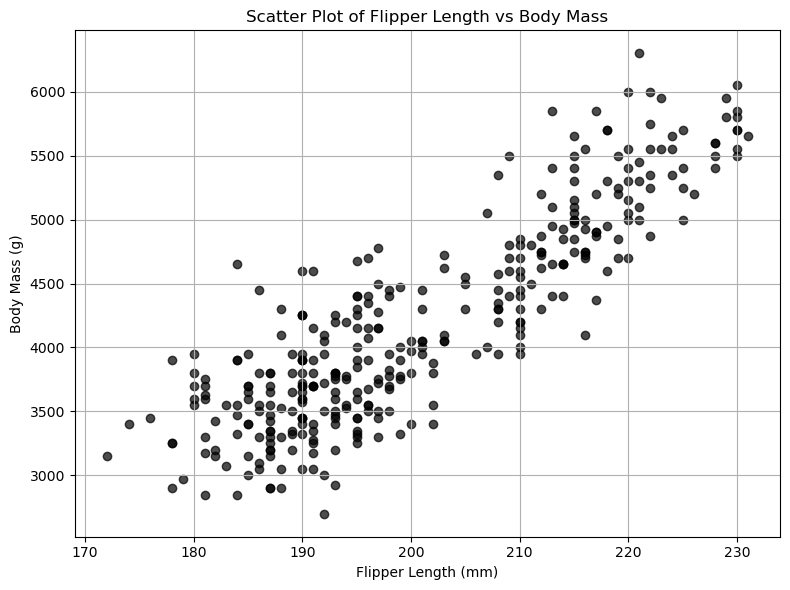

In [200]:

# Scatter plot of 'flipper_length_mm' vs 'body_mass_g'
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['flipper_length_mm'], cleaned_df['body_mass_g'], color='black', alpha=0.7)

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

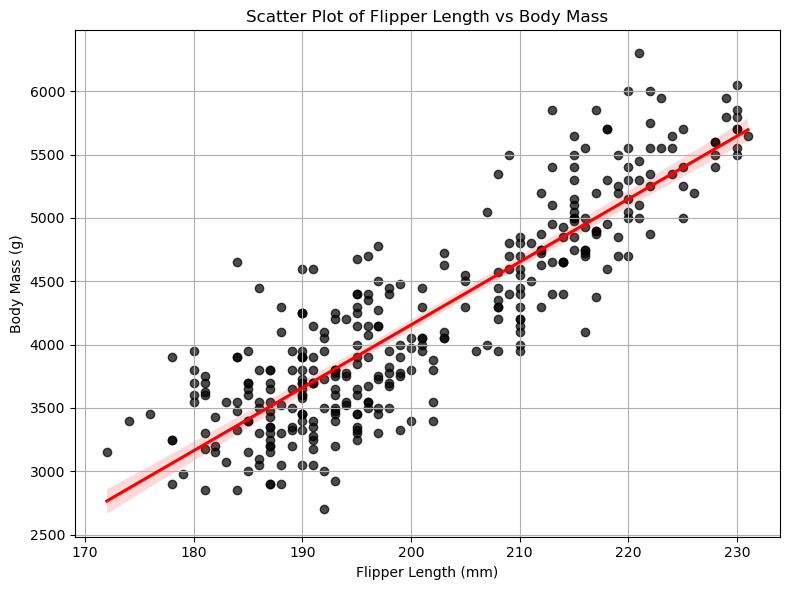

In [208]:
import seaborn as sbrn

# Scatter plot of 'flipper_length_mm' vs 'body_mass_g'
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['flipper_length_mm'], cleaned_df['body_mass_g'], color='black', alpha=0.7)

sbrn.regplot(x='flipper_length_mm', y='body_mass_g', data=cleaned_df, scatter=False, color='red')

# Add labels and title
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [209]:
flipper_length = cleaned_df['flipper_length_mm']
body_mass = cleaned_df['body_mass_g']

# Calculate the correlation coefficient
correlation = flipper_length.corr(body_mass)

print(correlation)

0.8712017673060113


In [210]:
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [211]:
# Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

In [212]:
# Sex of the penguins.
df["sex"]

0        male
1      female
2      female
3         NaN
4      female
        ...  
339      male
340    female
341      male
342      male
343    female
Name: sex, Length: 344, dtype: object

In [213]:
# Count the number of penguins of each sex.
df["sex"].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

In [214]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


***

### End